In [14]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.4/996.4 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [shap]1/2 [shap]


In [53]:
!pip install sklearn

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [39]:
!pip install fairlearn

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df = pd.read_csv('data/data.csv')
df.head(5)

,sno,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [22]:
df.columns

Index(['sno', 'age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [23]:
features = ['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [19]:
df = df.sample(frac=1)

In [21]:
# df.head(60)
        

In [25]:
df['gender']=pd.factorize(df['gender'])[0]
df.isna().sum()

sno         0
age         0
gender      0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
cleaned_df=df.dropna()
cleaned_df.shape[0]

293

In [27]:
x = cleaned_df.drop("target", axis=1)
y = cleaned_df["target"]

np.random.seed(42)

# Split
x_train, x_test, y_train, y_test = train_test_split(x[features], y, test_size=0.2)

In [35]:
x_train

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
251,43,0,0,132.0,247.0,1,0,143.0,1,0.1,1,4,3
173,58,0,2,132.0,224.0,0,0,173.0,0,3.2,2,2,3
56,48,0,0,122.0,222.0,0,0,186.0,0,0.0,2,0,2
152,64,0,3,170.0,227.0,0,0,155.0,0,0.6,1,0,3
86,68,0,2,118.0,277.0,0,1,151.0,0,1.0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,40,0,0,110.0,167.0,0,0,114.0,1,2.0,1,0,3
196,46,0,2,150.0,231.0,0,1,147.0,0,3.6,1,0,2
94,45,1,1,112.0,160.0,0,1,138.0,0,0.0,1,0,2
9,57,0,2,150.0,168.0,0,1,174.0,0,1.6,2,0,2


In [28]:
from sklearn.model_selection import RandomizedSearchCV

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(x_train, y_train)
rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': np.float64(1.623776739188721)}

In [29]:
rs_log_reg.score(x_test, y_test)

0.9322033898305084

In [30]:
x_test.iloc[0]

age          57.0
gender        0.0
cp            1.0
trestbps    124.0
chol        261.0
fbs           0.0
restecg       1.0
thalach     141.0
exang         0.0
oldpeak       0.3
slope         2.0
ca            0.0
thal          3.0
Name: 277, dtype: float64

In [31]:
rs_log_reg.predict(x_test)

array(['yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes'],
      dtype=object)

Q1

In [32]:
# === Save tuned model & print quick validation metrics ===
import os, joblib
import numpy as np

os.makedirs("models", exist_ok=True)

# Use the tuned estimator (already fitted by RandomizedSearchCV)
model = rs_log_reg.best_estimator_
print("[info] Best params:", rs_log_reg.best_params_)

joblib.dump(model, "models/heart.joblib")
with open("models/feature_names.txt", "w") as f:
    for n in x_train.columns: f.write(str(n) + "\n")
print("[ok] Saved → models/heart.joblib and models/feature_names.txt")


[info] Best params: {'solver': 'liblinear', 'C': np.float64(1.623776739188721)}
[ok] Saved → models/heart.joblib and models/feature_names.txt


In [33]:
# !rm -rf src

In [34]:

import os, json, numpy as np, matplotlib.pyplot as plt, joblib
import shap
from collections import defaultdict

os.makedirs("models", exist_ok=True)

# Load what we just saved (defensive)
model = joblib.load("models/heart.joblib")

# Build SHAP explainer; works for scikit estimators (LogReg in your case)
# For probabilistic models, SHAP will provide class-wise values; we pick the positive class.
explainer = shap.Explainer(model, x_test, feature_names=x_train.columns)
shap_values = explainer(x_test)
sv = shap_values.values
if sv.ndim == 3:
    # [n_samples, n_features, n_classes] -> take class 1
    sv = sv[:, :, 1]

# --- Global plots
plt.figure()
shap.plots.beeswarm(shap_values, show=False, max_display=20)
plt.tight_layout()
plt.savefig("models/shap_summary.png", dpi=200)
plt.close()

# Rank features by mean|SHAP|
mean_abs = np.abs(sv).mean(axis=0)
order = np.argsort(mean_abs)[::-1]
top = min(12, len(x_train.columns))
labels = [x_train.columns[i] for i in order[:top]][::-1]
scores = [mean_abs[i] for i in order[:top]][::-1]

plt.figure(figsize=(6,4))
plt.barh(labels, scores)
plt.xlabel("Mean |SHAP| (importance)")
plt.title("Top features (global importance)")
plt.tight_layout()
plt.savefig("models/shap_bar_top20.png", dpi=200)
plt.close()

# --- Local explanations for POSITIVE predictions only
if hasattr(model, "predict_proba"):
    proba = model.predict_proba(x_test)[:, 1]
else:
    # decision_function or predict as proxy
    raw = getattr(model, "decision_function", model.predict)(x_test)
    # min-max to [0,1] for presentation only
    proba = (raw - raw.min()) / (raw.max() - raw.min() + 1e-9)

preds = (proba >= 0.5).astype(int)
pos_mask = preds == 1

local_explanations = []
for i_row, (sv_row, p) in enumerate(zip(sv, proba)):
    if not pos_mask[i_row]:
        continue
    contribs = sorted(
        [{"feature": f, "shap_value": float(v)} for f, v in zip(x_train.columns, sv_row)],
        key=lambda d: abs(d["shap_value"]),
        reverse=True
    )[:5]
    local_explanations.append({
        "row_index": int(i_row),
        "predicted_probability": float(p),
        "top_contributors": contribs
    })

with open("models/local_explanations.json", "w") as f:
    json.dump(local_explanations, f, indent=2)

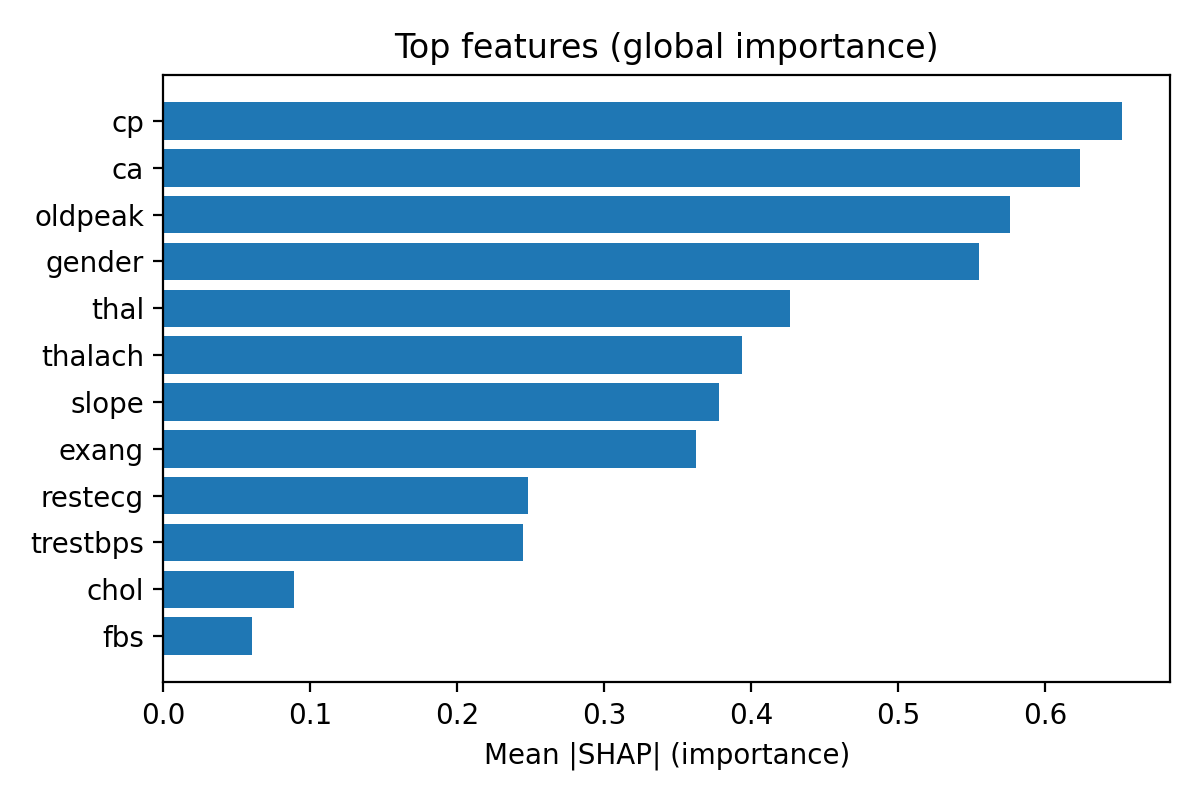

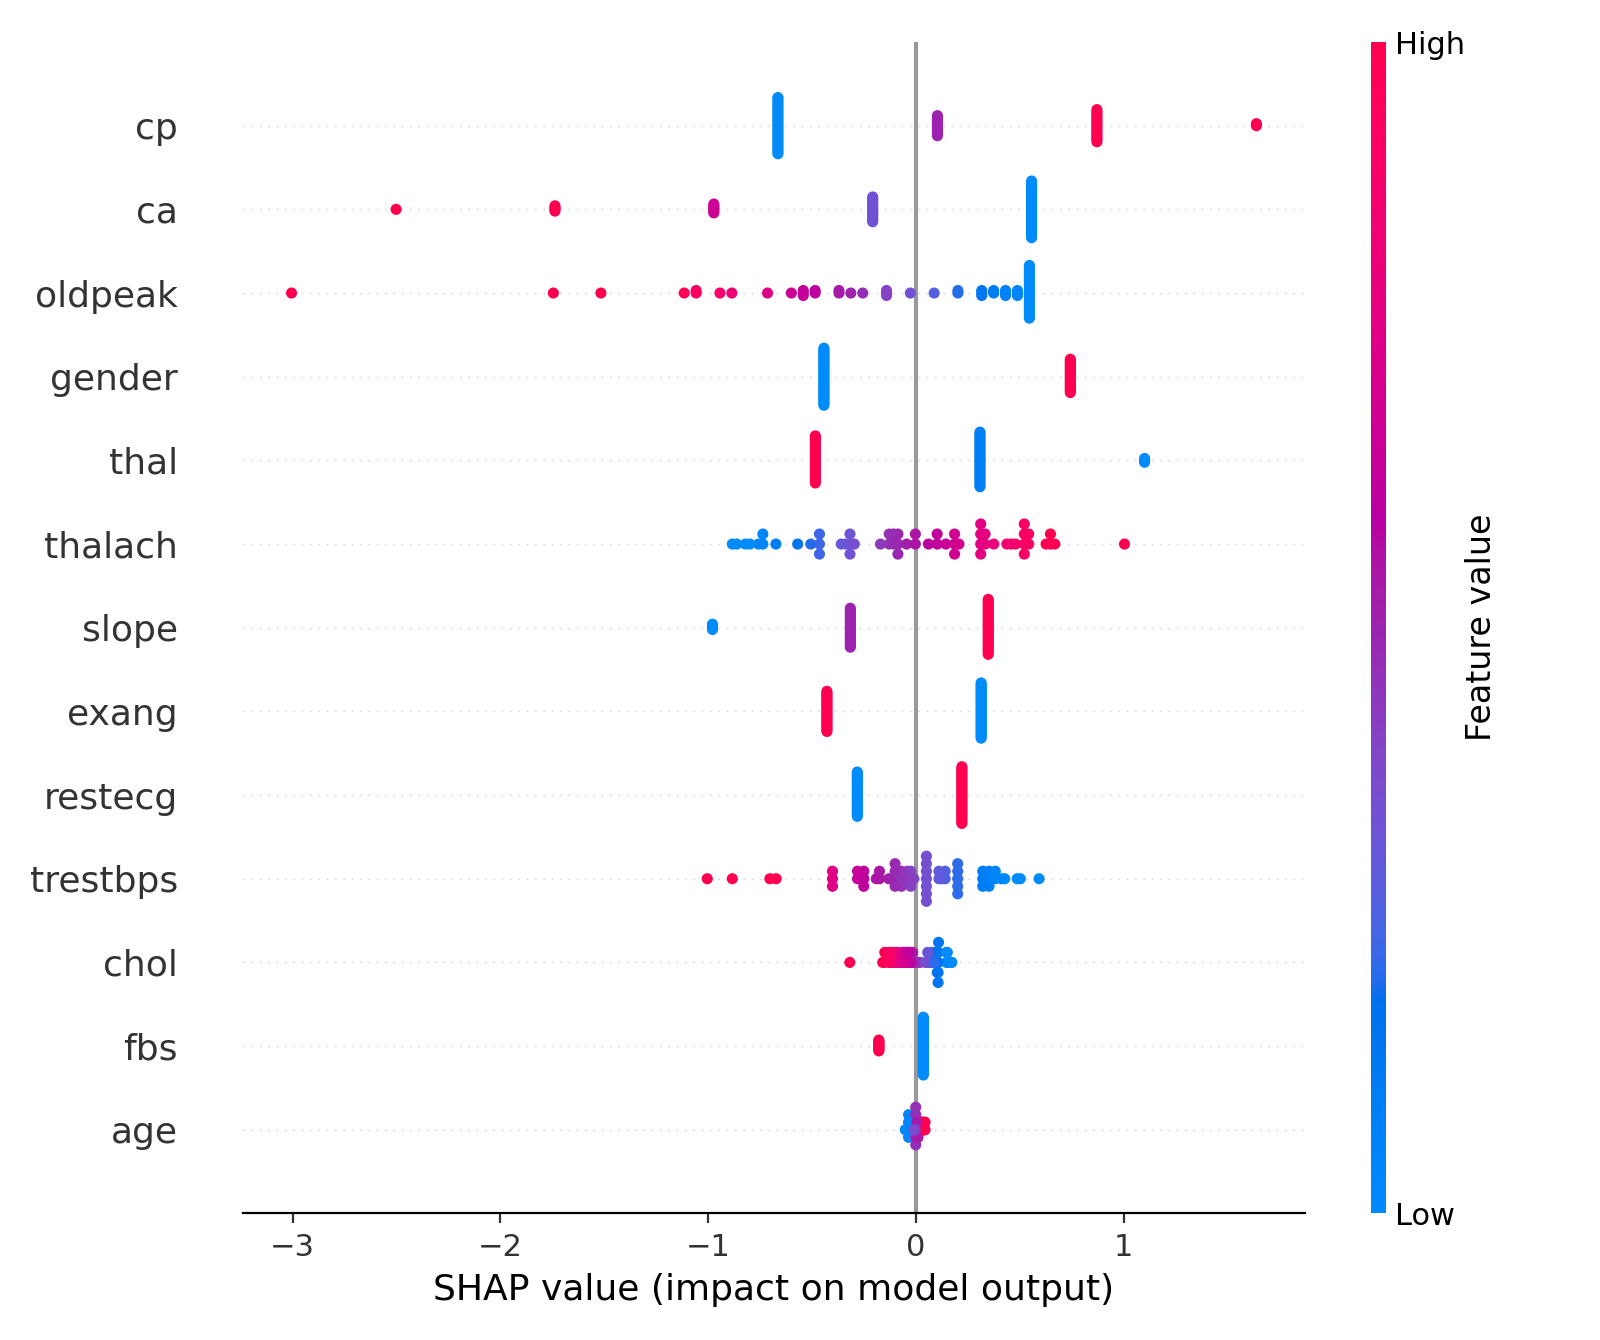

In [36]:
from IPython.display import Image, display

# Show the saved bar chart
display(Image(filename="models/shap_bar_top20.png"))

# Optionally also show the beeswarm summary plot
display(Image(filename="models/shap_summary.png"))


Explainability Key Takeaways 

Chest Pain Type (cp)
Chest pain type is the single most influential factor in the model’s predictions. Patients presenting with more severe or atypical chest pain patterns are much more likely to be classified as having heart disease. This makes sense clinically, since angina is a primary symptom of coronary artery problems.

Number of Major Vessels (ca)
The number of major blood vessels affected, as seen in angiography, strongly pushes the model toward predicting disease. The more vessels that are blocked or narrowed, the higher the predicted probability of heart disease.

ST Depression (oldpeak)
Exercise-induced ST depression is another key factor. When the ST segment drops significantly during exercise, it indicates reduced blood flow to the heart. The model has learned to associate higher oldpeak values with greater risk.


Resting ECG Results (restecg)
Abnormal resting ECG patterns, although not the strongest features, still influenced predictions. These abnormalities contribute to an elevated baseline risk.

Resting Blood Pressure (trestbps) and Cholesterol (chol)
Higher resting blood pressure and higher cholesterol levels both pushed predictions towards disease, though their contribution was weaker compared to exercise-related features and chest pain.

Fasting Blood Sugar (fbs)
Fasting blood sugar played the smallest role in the model’s decisions. While diabetes is a known risk factor, in this dataset its contribution was relatively minor compared to other cardiovascular indicators.

Q2


In [40]:
# If needed
# !pip install fairlearn==0.10.0 matplotlib

import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from fairlearn.metrics import (
    MetricFrame,
    selection_rate,
    demographic_parity_difference,
    demographic_parity_ratio,
    equalized_odds_difference,
    equalized_odds_ratio
)
import matplotlib.pyplot as plt


In [47]:
# Load model (already trained)
model = joblib.load("models/heart.joblib")

sensitive = x_test["gender"]

y_prob = model.predict_proba(x_test)[:, 1]

threshold = 0.5
y_pred = (y_prob >= threshold)


In [45]:
y_test

277     no
11     yes
217     no
298     no
63     yes
30     yes
187     no
105    yes
122    yes
163    yes
45     yes
128    yes
240     no
127    yes
70     yes
98     yes
276     no
24     yes
201     no
265     no
83     yes
36     yes
110    yes
43     yes
202     no
223     no
260     no
279     no
87     yes
225     no
204     no
255     no
29     yes
126    yes
61     yes
264     no
280     no
155    yes
60     yes
66     yes
248     no
134    yes
230     no
252     no
209     no
179     no
26     yes
159    yes
143    yes
132    yes
124    yes
25     yes
239     no
246     no
54     yes
235     no
193     no
178     no
200     no
Name: target, dtype: object

In [44]:
y_pred

array([ True,  True, False, False,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True, False, False, False,
       False,  True, False, False, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True, False, False, False,  True])

In [49]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from fairlearn.metrics import MetricFrame

# y_pred: boolean -> "yes"/"no"
y_pred_str = pd.Series(y_pred).map({True: "yes", False: "no"})
y_true_str = pd.Series(y_test).astype(str)

# sensitive feature
sensitive = x_test["gender"]

# custom selection rate for "yes"/"no" labels
def selection_rate_yes(yt, yp):
    yp_s = pd.Series(yp)
    return (yp_s == "yes").mean()

mf = MetricFrame(
    metrics={
        "accuracy":  lambda yt, yp: accuracy_score(yt, yp),
        "precision": lambda yt, yp: precision_score(yt, yp, pos_label="yes", zero_division=0),
        "recall":    lambda yt, yp: recall_score(yt, yp,    pos_label="yes", zero_division=0),
        "selection_rate": selection_rate_yes,   # ← fixed
    },
    y_true=y_true_str,
    y_pred=y_pred_str,
    sensitive_features=sensitive
)

print("== Overall ==")
print({
    "accuracy":  accuracy_score(y_true_str, y_pred_str),
    "precision": precision_score(y_true_str, y_pred_str, pos_label="yes", zero_division=0),
    "recall":    recall_score(y_true_str, y_pred_str,    pos_label="yes", zero_division=0),
    # AUC needs numeric labels
    "roc_auc":   roc_auc_score(y_true_str.map({"no":0,"yes":1}), y_prob)
})
print("\n== By gender ==")
display(mf.by_group)


== Overall ==
{'accuracy': 0.9322033898305084, 'precision': 0.8857142857142857, 'recall': 1.0, 'roc_auc': 0.9631336405529954}

== By gender ==


,accuracy,precision,recall,selection_rate
gender,,,,
0,0.891892,0.789474,1.0,0.513514
1,1.000000,1.000000,1.0,0.727273


In [50]:
from fairlearn.metrics import demographic_parity_difference, demographic_parity_ratio, \
                               equalized_odds_difference, equalized_odds_ratio
import numpy as np

y_true_num = y_true_str.map({"no":0, "yes":1}).to_numpy()
y_pred_num = y_pred_str.map({"no":0, "yes":1}).to_numpy()
sens_num   = pd.to_numeric(sensitive, errors="coerce").to_numpy()  # assumes 0/1; map if 'male'/'female'

dp_diff  = demographic_parity_difference(y_true=y_true_num, y_pred=y_pred_num, sensitive_features=sens_num)
dp_ratio = demographic_parity_ratio(     y_true=y_true_num, y_pred=y_pred_num, sensitive_features=sens_num)
eo_diff  = equalized_odds_difference(    y_true=y_true_num, y_pred=y_pred_num, sensitive_features=sens_num)
eo_ratio = equalized_odds_ratio(         y_true=y_true_num, y_pred=y_pred_num, sensitive_features=sens_num)

print("\n== Fairness summary ==")
print(f"Demographic Parity difference: {dp_diff:.3f} | ratio: {dp_ratio:.3f}")
print(f"Equalized Odds difference:     {eo_diff:.3f} | ratio: {eo_ratio:.3f}")



== Fairness summary ==
Demographic Parity difference: 0.214 | ratio: 0.706
Equalized Odds difference:     0.182 | ratio: 0.000


In [59]:
import sklearn, numpy, pandas, joblib
print("sklearn", sklearn.__version__)
print("numpy", numpy.__version__)
print("pandas", pandas.__version__)
print("joblib", joblib.__version__)

sklearn 1.7.0
numpy 2.1.3
pandas 2.3.1
joblib 1.5.1


Q4

In [60]:
API_URL = "http://35.244.28.120/predict" 

In [64]:
INPUT_CSV = "data/data.csv"          # your training CSV (already in the repo)
OUT_DIR   = "data/generated"
LOG_DIR   = "logs"
N_SAMPLES = 100  

In [65]:
import os, json, time, random
import numpy as np
import pandas as pd
import requests

os.makedirs(OUT_DIR, exist_ok=True)
os.makedirs(LOG_DIR, exist_ok=True)

In [74]:
x_test.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
277,57,0,1,124.0,261.0,0,1,141.0,0,0.3,2,0,3
11,48,1,2,130.0,275.0,0,1,139.0,0,0.2,2,0,2
217,63,0,0,130.0,330.0,1,0,132.0,1,1.8,2,3,3
298,57,1,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3
63,41,0,1,135.0,203.0,0,1,132.0,0,0.0,1,0,1


In [69]:
df_src.head()

,sno,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [87]:
# Load a reference dataset to infer distributions
df_src = pd.read_csv(INPUT_CSV)

df_src["sex"] = pd.factorize(df_src["gender"])[0]

# Columns must match your API schema & model feature order
feature_cols = [
    "age","sex","cp","trestbps","chol","fbs","restecg",
    "thalach","exang","oldpeak","slope","ca","thal"
]

missing = [c for c in feature_cols if c not in df_src.columns]
if missing:
    raise ValueError(f"data.csv missing required columns: {missing}")

# Helper samplers
def sample_numeric(series: pd.Series) -> float:
    s = series.dropna().astype(float)
    lo, hi = np.percentile(s, [1, 99])
    mu, sd = float(s.mean()), float(s.std() or 1.0)
    x = float(np.clip(np.random.normal(mu, sd), lo, hi))
    return int(round(x)) if pd.api.types.is_integer_dtype(series) else x

def sample_categorical(series: pd.Series):
    s = series.dropna()
    vals = s.value_counts(normalize=True)
    return np.random.choice(vals.index, p=vals.values)

def sample_row() -> dict:
    row = {}
    for c in feature_cols:
        s = df_src[c]
        if pd.api.types.is_numeric_dtype(s):
            row[c] = sample_numeric(s)
        else:
            row[c] = sample_categorical(s)
    # Cast to the numeric types your API expects
    for c in feature_cols:
        row[c] = float(row[c])
        if c in ("sex","cp","fbs","restecg","exang","slope","ca","thal"):
            row[c] = int(round(row[c]))
    return row

# Generate N_SAMPLES rows
rows = [sample_row() for _ in range(N_SAMPLES)]
X_100 = pd.DataFrame(rows, columns=feature_cols)
X_100_path = f"{OUT_DIR}/test_{N_SAMPLES}.csv"
X_100.to_csv(X_100_path, index=False)
X_100.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,61.0,1,1,120.300831,257.685407,0,1,186.602828,1,1.279536,2,2,2
1,55.0,1,2,122.837293,215.006393,0,1,186.140078,1,1.222081,1,1,2
2,37.0,1,0,125.985894,280.388270,1,1,122.931251,0,0.251832,1,2,1
3,51.0,0,0,142.034010,172.868910,0,1,183.724194,0,0.000000,1,2,2
4,53.0,0,1,158.961786,207.431139,0,0,137.681660,0,1.292806,1,0,3


In [88]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 277 to 200
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       59 non-null     int64  
 1   gender    59 non-null     int64  
 2   cp        59 non-null     int64  
 3   trestbps  59 non-null     float64
 4   chol      59 non-null     float64
 5   fbs       59 non-null     int64  
 6   restecg   59 non-null     int64  
 7   thalach   59 non-null     float64
 8   exang     59 non-null     int64  
 9   oldpeak   59 non-null     float64
 10  slope     59 non-null     int64  
 11  ca        59 non-null     int64  
 12  thal      59 non-null     int64  
dtypes: float64(4), int64(9)
memory usage: 6.5 KB


In [93]:
X_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       100 non-null    int64  
 1   sex       100 non-null    int64  
 2   cp        100 non-null    int64  
 3   trestbps  100 non-null    float64
 4   chol      100 non-null    float64
 5   fbs       100 non-null    int64  
 6   restecg   100 non-null    int64  
 7   thalach   100 non-null    float64
 8   exang     100 non-null    int64  
 9   oldpeak   100 non-null    float64
 10  slope     100 non-null    int64  
 11  ca        100 non-null    int64  
 12  thal      100 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 10.3 KB


In [90]:
X_100['age'] = X_100['age'].astype('int64')

X_100['sex'] = X_100['sex'].astype('int64')


In [98]:
# jsonl_path = f"{LOG_DIR}/predictions_{N_SAMPLES}.jsonl"
# csv_joined = f"{LOG_DIR}/predictions_with_outputs_{N_SAMPLES}.csv"

# # If you want to measure /metrics delta, grab it before the run:
# def fetch_metrics():
#     try:
#         m = requests.get(API_URL.replace("/predict", "/metrics"), timeout=5).text
#         return m
#     except Exception:
#         return ""

# metrics_before = fetch_metrics()

# out_rows = []
# with requests.Session() as sess:
#     for i, r in X_100.iterrows():
#         payload = r.to_dict()
#         t0 = time.time()
#         resp = sess.post(API_URL, json=payload, timeout=5)
#         latency = time.time() - t0
#         resp.raise_for_status()
#         js = resp.json()
#         log = {
#             "ts": time.time(),
#             "index": int(i),
#             "latency_s": latency,
#             "request": payload,
#             "response": js
#         }
#         out_rows.append({**payload, **js, "latency_s": latency})
#         with open(jsonl_path, "a") as f:
#             f.write(json.dumps(log) + "\n")

# pd.DataFrame(out_rows).to_csv(csv_joined, index=False)

# metrics_after = fetch_metrics()

# print("[ok] wrote:")
# print(" ", X_100_path)
# print(" ", jsonl_path)
# print(" ", csv_joined)


In [95]:
import pandas as pd
import numpy as np

# The feature names and types your API expects
FEATURE_COLS = ["age","sex","cp","trestbps","chol","fbs","restecg",
                "thalach","exang","oldpeak","slope","ca","thal"]

INT_FIELDS   = ["age","sex","cp","fbs","restecg","exang","slope","ca","thal"]
FLOAT_FIELDS = ["trestbps","chol","thalach","oldpeak"]

def ensure_schema_columns(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # Map/rename gender -> sex (exactly what the API expects)
    if "sex" not in df.columns:
        if "gender" in df.columns:
            # factorize strings or cast ints
            if pd.api.types.is_integer_dtype(df["gender"]) or pd.api.types.is_bool_dtype(df["gender"]):
                df["sex"] = df["gender"].astype(int)
            else:
                df["sex"] = pd.factorize(df["gender"])[0].astype(int)
            df.drop(columns=["gender"], inplace=True)
        else:
            raise ValueError("Input must contain either 'sex' or 'gender' column.")

    # Keep only expected features and in the required order
    missing = [c for c in FEATURE_COLS if c not in df.columns]
    if missing:
        raise ValueError(f"Missing expected columns: {missing}")

    df = df[FEATURE_COLS]

    # Fill NaNs with median (or 0 fallback)
    for c in FEATURE_COLS:
        if df[c].isna().any():
            med = df[c].median()
            df[c] = df[c].fillna(0 if pd.isna(med) else med)

    return df


In [96]:
# Reasonable bounds/sets for the UCI heart dataset (and common classroom schemas)
BOUNDS = {
    "age":      (18, 100),
    "trestbps": (80, 220),
    "chol":     (100, 600),
    "thalach":  (60, 220),
    "oldpeak":  (0.0, 7.0),
}
SETS = {
    "sex":     {0,1},
    "cp":      {0,1,2,3},
    "fbs":     {0,1},
    "restecg": {0,1,2},
    "exang":   {0,1},
    "slope":   {0,1,2},
    "ca":      {0,1,2,3,4},
    "thal":    {1,2,3},  # many schemas disallow 0 for thal
}

def clip_to_schema(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    # first cast numerics to float to avoid errors, then clamp
    for k in FEATURE_COLS:
        df[k] = pd.to_numeric(df[k], errors="coerce")
        if df[k].isna().any():
            df[k] = df[k].fillna(df[k].median() if not pd.isna(df[k].median()) else 0)

    def fix_row(row):
        out = {}
        for k in FEATURE_COLS:
            v = row[k]

            if k == "oldpeak":
                v = float(v)
                lo, hi = BOUNDS["oldpeak"]
                v = float(min(max(v, lo), hi))
            elif k in BOUNDS:
                v = int(round(float(v)))
                lo, hi = BOUNDS[k]
                v = int(min(max(v, lo), hi))
            elif k in SETS:
                v = int(round(float(v)))
                # clamp into defined set
                lo, hi = min(SETS[k]), max(SETS[k])
                v = int(min(max(v, lo), hi))
                if v not in SETS[k]:
                    # if set is sparse (e.g., {1,2,3}) clamp again
                    v = min(SETS[k], key=lambda x: abs(x - v))
            else:
                # default int
                v = int(round(float(v)))

            out[k] = v
        return pd.Series(out)

    fixed = df.apply(fix_row, axis=1)

    # enforce final dtypes exactly
    for c in INT_FIELDS:
        fixed[c] = fixed[c].astype(int)
    for c in FLOAT_FIELDS:
        fixed[c] = fixed[c].astype(float)

    return fixed


In [97]:
import requests, time, json, os

API_URL   = "http://35.244.28.120/predict"   # or http://localhost:8081/predict if port-forwarding
LOG_DIR   = "logs"
N_SAMPLES = 100

os.makedirs(LOG_DIR, exist_ok=True)

# Use the 100-row DataFrame you generated earlier; if not, create it now:
# X_100 = <your generated DF>
# Normalize -> Sanitize
X_100_norm  = ensure_schema_columns(X_100)      # handles gender->sex, order, NaNs
X_100_clean = clip_to_schema(X_100_norm)        # clamps & types

# Optional: sanity checks
assert list(X_100_clean.columns) == FEATURE_COLS, "Column order mismatch"
assert not X_100_clean.isna().any().any(), "NaNs remain after cleaning"
assert all(np.issubdtype(X_100_clean[c].dtype, np.integer) for c in INT_FIELDS), "Some int fields not int"
assert np.issubdtype(X_100_clean["oldpeak"].dtype, np.floating), "oldpeak not float"

jsonl_path = f"{LOG_DIR}/predictions_{N_SAMPLES}.jsonl"
csv_path   = f"{LOG_DIR}/predictions_with_outputs_{N_SAMPLES}.csv"

# remove old logs
for p in (jsonl_path, csv_path):
    try: os.remove(p)
    except FileNotFoundError: pass

out_rows = []
with requests.Session() as sess:
    for i, r in X_100_clean.head(N_SAMPLES).iterrows():
        # ensure pure Python types (avoid some np types in JSON)
        payload = {k: (float(r[k]) if k=="oldpeak" else int(r[k])) for k in FEATURE_COLS}

        t0 = time.time()
        resp = sess.post(API_URL, json=payload, timeout=5)
        latency = time.time() - t0

        if resp.status_code != 200:
            print(f"\n❌ Failed at row {i}: HTTP {resp.status_code}")
            print("Server said:\n", resp.text)
            print("Payload was:\n", json.dumps(payload, indent=2))
            raise SystemExit("Stopped on first error. See details above.")

        js = resp.json()

        # write JSONL
        with open(jsonl_path, "a") as f:
            f.write(json.dumps({
                "ts": time.time(),
                "index": int(i),
                "latency_s": latency,
                "request": payload,
                "response": js
            }) + "\n")

        out_rows.append({**payload, **js, "latency_s": latency})

pd.DataFrame(out_rows).to_csv(csv_path, index=False)
print("[ok] Wrote:", jsonl_path, "and", csv_path)


[ok] Wrote: logs/predictions_100.jsonl and logs/predictions_with_outputs_100.csv


Q6

In [101]:
import pandas as pd

train_df = pd.read_csv("data/data.csv")
new_df   = pd.read_csv("data/generated/test_100.csv")

# Handle gender→sex renaming if needed
if "sex" not in train_df.columns and "gender" in train_df.columns:
    train_df["sex"] = pd.factorize(train_df["gender"])[0]
    train_df = train_df.drop(columns=["gender"])

features = ["age","sex","cp","trestbps","chol","fbs","restecg",
            "thalach","exang","oldpeak","slope","ca","thal"]

train_summary = train_df[features].describe().T
new_summary   = new_df[features].describe().T

print("=== Training summary ===")
display(train_summary[["mean","std","min","max"]])
print("\n=== New data summary ===")
display(new_summary[["mean","std","min","max"]])


=== Training summary ===


,mean,std,min,max
age,54.366337,9.082101,29.0,77.0
sex,0.316832,0.466011,0.0,1.0
cp,0.966997,1.032052,0.0,3.0
trestbps,131.712375,17.629032,94.0,200.0
chol,246.317881,51.908285,126.0,564.0
fbs,0.148515,0.356198,0.0,1.0
restecg,0.528053,0.525860,0.0,2.0
thalach,149.865772,22.563687,71.0,202.0
exang,0.326733,0.469794,0.0,1.0
oldpeak,1.039604,1.161075,0.0,6.2



=== New data summary ===


,mean,std,min,max
age,54.310000,8.637123,35.00,71.000000
sex,0.390000,0.490207,0.00,1.000000
cp,1.090000,1.035677,0.00,3.000000
trestbps,128.616925,16.398146,100.00,167.588031
chol,249.289412,52.609852,149.00,368.385510
fbs,0.130000,0.337998,0.00,1.000000
restecg,0.610000,0.548552,0.00,2.000000
thalach,148.950816,23.647229,95.97,191.166206
exang,0.330000,0.472582,0.00,1.000000
oldpeak,1.244925,0.891796,0.00,3.084245


In [104]:
from scipy.stats import ks_2samp, chisquare
import numpy as np

drift_report = {}
for col in features:
    if train_df[col].nunique() > 10:  # treat as continuous
        stat, pval = ks_2samp(train_df[col], new_df[col])
        drift_report[col] = {"test":"KS", "p_value":pval}
    else:  # categorical
        train_counts = train_df[col].value_counts(normalize=True)
        new_counts   = new_df[col].value_counts(normalize=True)
        # align indexes
        all_idx = sorted(set(train_counts.index).union(new_counts.index))
        train_vec = train_counts.reindex(all_idx, fill_value=0).values
        new_vec   = new_counts.reindex(all_idx, fill_value=0).values
        chi2 = np.sum((train_vec - new_vec)**2 / (train_vec+1e-9))
        drift_report[col] = {"test":"Chi-square approx", "statistic":chi2}

import pandas as pd
drift_df = pd.DataFrame(drift_report).T
drift_df


,test,p_value,statistic
age,KS,0.653132,NaN
sex,Chi-square approx,NaN,0.024734
cp,Chi-square approx,NaN,0.157991
trestbps,KS,NaN,NaN
chol,KS,NaN,NaN
fbs,Chi-square approx,NaN,0.002711
restecg,Chi-square approx,NaN,0.034785
thalach,KS,NaN,NaN
exang,Chi-square approx,NaN,0.000049
oldpeak,KS,0.00118,NaN


In [106]:
import os, json, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

os.makedirs("logs", exist_ok=True)
os.makedirs("models", exist_ok=True)

# Load data
train_df = pd.read_csv("data/data.csv")
new_df   = pd.read_csv("data/generated/test_100.csv")

# Ensure feature set matches API / model
FEATURES = ["age","sex","cp","trestbps","chol","fbs","restecg",
            "thalach","exang","oldpeak","slope","ca","thal"]

# Map gender->sex if needed
def ensure_sex(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    if "sex" not in df.columns:
        if "gender" in df.columns:
            if pd.api.types.is_integer_dtype(df["gender"]) or pd.api.types.is_bool_dtype(df["gender"]):
                df["sex"] = df["gender"].astype(int)
            else:
                df["sex"] = pd.factorize(df["gender"])[0].astype(int)
            df.drop(columns=["gender"], inplace=True, errors="ignore")
        else:
            raise ValueError("Need column 'sex' or 'gender' in data.")
    return df

train_df = ensure_sex(train_df)
new_df   = ensure_sex(new_df)

missing_train = [c for c in FEATURES if c not in train_df.columns]
missing_new   = [c for c in FEATURES if c not in new_df.columns]
if missing_train or missing_new:
    raise ValueError(f"Missing columns - train:{missing_train}, new:{missing_new}")

# Keep only features; coerce types; simple NA handling
def clean(df):
    df = df[FEATURES].copy()
    for c in FEATURES:
        if c == "oldpeak":
            df[c] = pd.to_numeric(df[c], errors="coerce").fillna(df[c].median()).astype(float)
        else:
            df[c] = pd.to_numeric(df[c], errors="coerce").fillna(df[c].median()).round().astype(int)
    return df

X_train_base = clean(train_df)
X_new_base   = clean(new_df)

# Build labeled dataset: train=0, new=1
X_combined = pd.concat([X_train_base, X_new_base], ignore_index=True)
y_source   = np.array([0]*len(X_train_base) + [1]*len(X_new_base))


In [107]:
# To avoid big class imbalance (train usually >> new), either downsample or use class_weight.
# We'll use class_weight and also optionally downsample train to match new size.
n_new = len(X_new_base)
if len(X_train_base) > 5 * n_new:
    # keep it reasonable: sample ~ up to 5x the new set to speed up CV
    X_train_sampled = X_train_base.sample(n=5*n_new, random_state=42)
    X_use = pd.concat([X_train_sampled, X_new_base], ignore_index=True)
    y_use = np.array([0]*len(X_train_sampled) + [1]*len(X_new_base))
else:
    X_use = X_combined
    y_use = y_source

clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    n_jobs=-1,
    class_weight="balanced",
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_cv = cross_val_score(clf, X_use, y_use, scoring="roc_auc", cv=cv, n_jobs=-1)
print(f"Drift AUC (5-fold CV): mean={auc_cv.mean():.3f}, std={auc_cv.std():.3f}")


Drift AUC (5-fold CV): mean=0.731, std=0.032


In [108]:
# Train/test split to show a ROC curve
X_tr, X_te, y_tr, y_te = train_test_split(X_use, y_use, test_size=0.3, stratify=y_use, random_state=42)
clf.fit(X_tr, y_tr)
proba = clf.predict_proba(X_te)[:,1]
auc_holdout = roc_auc_score(y_te, proba)
print(f"Holdout AUC: {auc_holdout:.3f}")

# ROC curve
plt.figure()
RocCurveDisplay.from_predictions(y_te, proba)
plt.title("Drift Classifier ROC (train=0 vs new=1)")
plt.tight_layout()
plt.savefig("logs/drift_roc.png", dpi=160)
plt.close()

# Feature importances (what drives drift)
importances = pd.Series(clf.feature_importances_, index=FEATURES).sort_values(ascending=True)

plt.figure(figsize=(6,4))
importances.plot(kind="barh")
plt.title("Feature importances (drift classifier)")
plt.tight_layout()
plt.savefig("logs/drift_feature_importances.png", dpi=160)
plt.close()

# Permutation importance on holdout (more robust)
perm = permutation_importance(clf, X_te, y_te, n_repeats=10, random_state=42, n_jobs=-1)
perm_imp = pd.Series(perm.importances_mean, index=FEATURES).sort_values()

plt.figure(figsize=(6,4))
perm_imp.plot(kind="barh")
plt.title("Permutation importance (drift classifier)")
plt.tight_layout()
plt.savefig("logs/drift_permutation_importance.png", dpi=160)
plt.close()

# Save a small report
report = {
    "cv_auc_mean": float(auc_cv.mean()),
    "cv_auc_std": float(auc_cv.std()),
    "holdout_auc": float(auc_holdout),
    "top_features_tree": importances.sort_values(ascending=False).head(5).to_dict(),
    "top_features_permutation": perm_imp.sort_values(ascending=False).head(5).to_dict()
}
with open("logs/drift_classifier_report.json", "w") as f:
    json.dump(report, f, indent=2)
report


Holdout AUC: 0.788


{'cv_auc_mean': 0.7314890710382513,
 'cv_auc_std': 0.03216923461024894,
 'holdout_auc': 0.7875457875457875,
 'top_features_tree': {'oldpeak': 0.15673385395413306,
  'thalach': 0.14485672396003513,
  'trestbps': 0.13540937658122598,
  'chol': 0.13493285429089402,
  'age': 0.12200009086939796},
 'top_features_permutation': {'cp': 0.013223140495867747,
  'sex': 0.0066115702479338625,
  'restecg': 0.004132231404958664,
  'slope': 0.0033057851239669312,
  'fbs': 0.0}}

<Figure size 640x480 with 0 Axes>

Q7

Baseline performance: {'accuracy': 0.9322033898305084, 'precision': 0.8857142857142857, 'recall': 1.0, 'roc_auc': 0.9631336405529954}
Poisoned 46 samples out of 234
Poisoned performance: {'accuracy': 0.847457627118644, 'precision': 0.775, 'recall': 1.0, 'roc_auc': 0.8986175115207374}
          accuracy  precision  recall   roc_auc
Clean     0.932203   0.885714     1.0  0.963134
Poisoned  0.847458   0.775000     1.0  0.898618


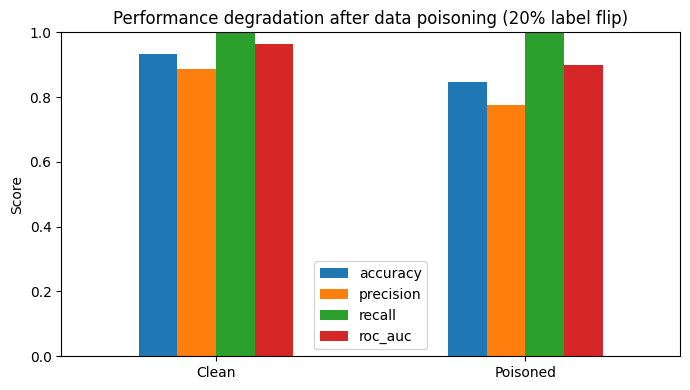

In [109]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# --- Step 1: Baseline performance (already trained best model)
baseline_preds = rs_log_reg.predict(x_test)
baseline_proba = rs_log_reg.predict_proba(x_test)[:,1]

baseline_metrics = {
    "accuracy": accuracy_score(y_test, baseline_preds),
    "precision": precision_score(y_test, baseline_preds, pos_label="yes"),
    "recall": recall_score(y_test, baseline_preds, pos_label="yes"),
    "roc_auc": roc_auc_score(y_test.map({"no":0,"yes":1}), baseline_proba)
}
print("Baseline performance:", baseline_metrics)

# --- Step 2: Poison training labels (flip 20% at random)
poison_frac = 0.2
y_train_poisoned = y_train.copy()

n_poison = int(len(y_train_poisoned) * poison_frac)
np.random.seed(42)
idx_poison = np.random.choice(len(y_train_poisoned), size=n_poison, replace=False)

# flip labels
y_train_poisoned.iloc[idx_poison] = y_train_poisoned.iloc[idx_poison].map({"yes":"no","no":"yes"})

print(f"Poisoned {n_poison} samples out of {len(y_train_poisoned)}")

# --- Step 3: Retrain with poisoned labels
clf_poison = LogisticRegression(**rs_log_reg.best_params_, max_iter=1000)
clf_poison.fit(x_train, y_train_poisoned)

# --- Step 4: Evaluate poisoned model
y_pred_poison = clf_poison.predict(x_test)
y_prob_poison = clf_poison.predict_proba(x_test)[:,1]

poison_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_poison),
    "precision": precision_score(y_test, y_pred_poison, pos_label="yes"),
    "recall": recall_score(y_test, y_pred_poison, pos_label="yes"),
    "roc_auc": roc_auc_score(y_test.map({"no":0,"yes":1}), y_prob_poison)
}
print("Poisoned performance:", poison_metrics)

# --- Step 5: Compare side by side
df_compare = pd.DataFrame([baseline_metrics, poison_metrics], index=["Clean", "Poisoned"])
print(df_compare)

df_compare.plot(kind="bar", figsize=(7,4))
plt.title("Performance degradation after data poisoning (20% label flip)")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("logs/poisoning_comparison.png", dpi=150)
plt.show()
